### 1203. Sort Items by Groups Respecting Dependenices - 1/14/2025

In [ ]:
############################### Improvement Table ###########################################
"""
Repitition # -  Time Taken   
1st Repetition - 1hr ++

"""

### Time Complexity
- Time Complexity: O(n + e)

### Model Answer

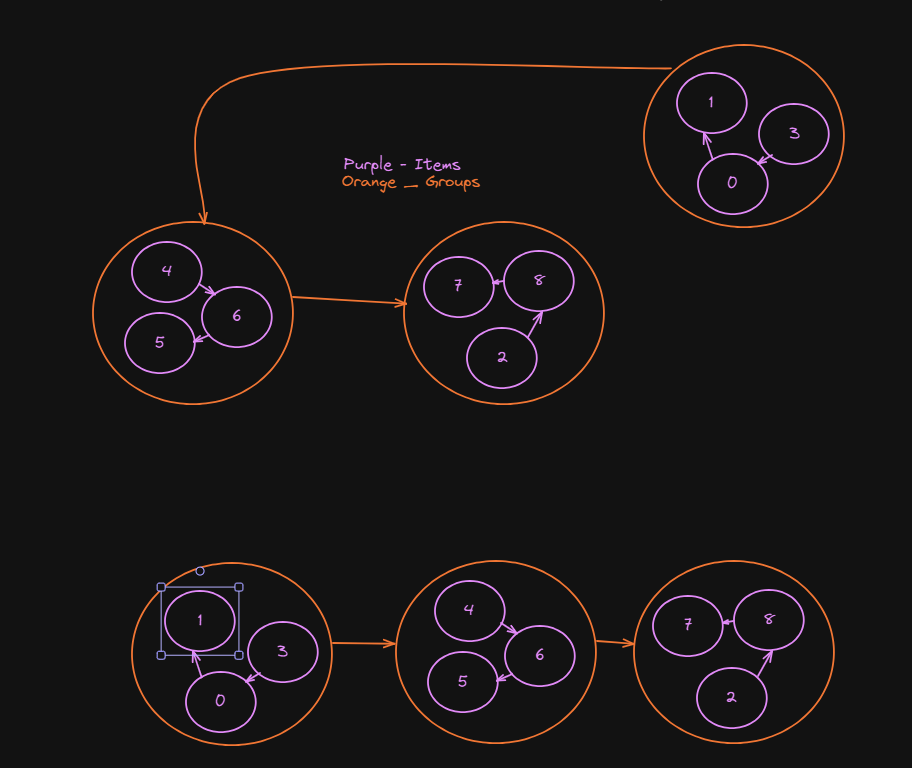

In [ ]:
from collections import defaultdict, deque
from typing import List

class Solution:
    def topologicalSort(self, graph: List[List[int]], indegree: List[int], num_nodes: int) -> List[int]:
        order = []
        queue = deque(node for node in range(num_nodes) if indegree[node] == 0)
        
        while queue:
            node = queue.popleft()
            order.append(node)
            for neighbor in graph[node]:
                indegree[neighbor] -= 1
                if indegree[neighbor] == 0:
                    queue.append(neighbor)
        
        return order if len(order) == num_nodes else []

    def sortItems(self, n: int, m: int, group: List[int], beforeItems: List[List[int]]) -> List[int]:
        # Step 1: Assign new group IDs to items that belong to no group
        for item in range(n):
            if group[item] == -1: 
                group[item] = m
                m += 1
        
        # Step 2: Build the graphs for items and groups
        item_graph = defaultdict(list)
        item_indegree = [0] * n
        group_graph = defaultdict(list)
        group_indegree = [0] * m
        
        # Step 3: Build the item and group graphs based on dependencies
        for item in range(n):
            current_group = group[item]
            for before in beforeItems[item]:
                before_group = group[before]
                if current_group == before_group:
                    item_graph[before].append(item)
                    item_indegree[item] += 1
                else:
                    group_graph[before_group].append(current_group)
                    group_indegree[current_group] += 1
        
        # Step 4: Perform topological sort for the groups
        groups_order = self.topologicalSort(group_graph, group_indegree, m)
        
        # Step 5: Perform topological sort for the items
        items_order = self.topologicalSort(item_graph, item_indegree, n)
        
        # Step 6: If no valid ordering exists, return an empty list
        if not groups_order or not items_order:
            return []
        
        # Step 7: Group items by their group ID
        items_grouped = [[] for _ in range(m)]
        for item in items_order:
            items_grouped[group[item]].append(item)
        
        # Step 8: Build the final result by extending the items for each group in order
        result = []
        for grp in groups_order:
            result.extend(items_grouped[grp])
        
        return result

### 1st Repetition -> 1st Attempt

In [ ]:
class Solution:
    def sortItems(self, n: int, m: int, group: List[int], beforeItems: List[List[int]]) -> List[int]:
        # Step 1: Assign new group IDs to items that belong to no group
        for i in range(n):
            if group[i] == -1:
                group[i] = m
                m += 1

        # Step 2: Build the graphs for items and groups
        item_graph = defaultdict(list)
        item_indegree = [0] * n
        group_graph = defaultdict(list)
        group_indegree = [0] * m
        
        # Build item graph and group graph based on dependencies
        for curr_item in range(n):
            for prev_item in beforeItems[curr_item]:
                item_graph[prev_item].append(curr_item)
                item_indegree[curr_item] += 1
                if group[prev_item] != group[curr_item]:
                    group_graph[group[prev_item]].append(group[curr_item])
                    group_indegree[group[curr_item]] += 1

        # Step 3: Topological sort function
        def topologicalSort(graph, indegree, nodes):
            que = deque([node for node in nodes if indegree[node] == 0])
            sortedOrder = []

            while que:
                node = que.popleft()
                sortedOrder.append(node)
                for nei in graph[node]:
                    indegree[nei] -= 1
                    if indegree[nei] == 0:
                        que.append(nei)

            return sortedOrder if len(sortedOrder) == len(nodes) else []

        # Step 4: Topologically sort the groups
        groupOrder = topologicalSort(group_graph, group_indegree, range(m))
        if not groupOrder:
            return []  # Cycle detected in group graph, no valid ordering

        # Step 5: Map each group to its corresponding items
        group_to_items = defaultdict(list)
        for item in range(n):
            group_to_items[group[item]].append(item)

        # Step 6: Topologically sort items within each group
        sortedItems = []
        for g in groupOrder:
            groupItems = group_to_items[g]
            if groupItems:
                # Reset the indegree array for items
                item_indegree = [0] * n
                for item in groupItems:
                    for nei in item_graph[item]:
                        item_indegree[nei] += 1

                # Sort the items within the current group
                item_order = topologicalSort(item_graph, item_indegree, groupItems)
                if not item_order:
                    return []  # Cycle detected in item graph, no valid ordering
                sortedItems.extend(item_order)

        return sortedItems